In [1]:
%run "..\src\utils\style_and_packages.ipynb"

# Beispiel: Logarithmisches Dekrement 

## Aufgabenstellung

Das in @fig-ems_log_dek_system dargestellte System zeigt ein Rahmentragwerk. Dieses kann als Einmassenschwinger modelliert werden, welcher eine gedämpfte freie Schwingung erfährt.

![Am Riegel ausgelenktes System](../images/aufgabe_ems_log_dek.svg){#fig-ems_log_dek_system}

Um die Systemeigenschaften des Rahmens zu untersuchen, wird 
eine Kopfverschiebung bzw. Auslenkung des Rahmens von $u_0 = 20\text{ mm}$ aufgebracht. Danach wird die Halterung schlagartig gelöst und der Rahmen kann frei schwingen. Die angebrachte Messeinrichtung registriert eine max. Kopfverschiebung nach dem ersten Zurückschwingen von $u_1 = 15\text{ mm}$ nach $T_D = 0.2 \text{s}$. 

Gesucht:

- Laterale bzw. horizontale Steifigkeit $k$ des Rahmens
- Die Dämpfungsrate $\zeta$ und die Dämpfungskonstante $c$
- Die Amplitude der Auslenkung des Rahmens nach 10 Schwingzyklen

Gegeben:


In [2]:
EA_riegel, EI_riegel,EA_stuetze, EI_stuetze, k, m, u, c, T_D, zeta, H, u_0, u_1 = sp.symbols('EA_riegel, EI_riegel,EA_stuetze, EI_stuetze, k, m, u, c,T_D, zeta H u_0 u_1')

In [3]:
#| label: tbl-parameter_log_dekrement
#| tbl-cap: Parameter der Aufgabenstellung

params = {EA_riegel:sp.oo,
          EI_riegel:sp.oo,
          EA_stuetze:sp.oo,
          m:1941*unit.N*unit.second**2/unit.m,
          u_0:20*unit.mm,
          u_1:15*unit.mm,
          T_D:0.2*unit.second}

render.dict_to_table(params)

|   |   |
|---|---|
| $EA_{riegel} = \infty$ | $EA_{stuetze} = \infty$ |
| $EI_{riegel} = \infty$ | $T_{D} = 0.2 \text{s}$ |
| $m = \frac{1941 \text{N} \text{s}^{2}}{\text{m}}$ | $u_{0} = 20 \text{mm}$ |
| $u_{1} = 15 \text{mm}$ | |


{{< pagebreak >}}

## Musterlösung{#sec-ml_log_dek}

### Horizontale Steifigkeit

#### Logarithmisches Dekrement

Da keine Angaben über die Profile der Stützen gemacht werden, kann mittels des logarithmischen Dekrements die Eigenkreisfrequenz bestimmt werden. Anhand der Eigenkreisfrequenz lässt sich die Steifigkeit ableiten.



C:\Users\Pascal Gitz\miniconda3\envs\calcs\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


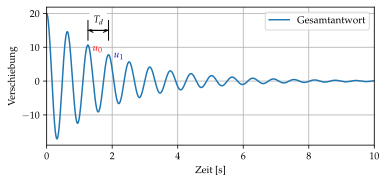

In [4]:
#| label: fig-ems_log_dek_zerfall
#| fig-cap: "Beispiel eines logarithmischen Dekrements"

def plot_log_dek():

    parameter_1 = {'omega_1':10,
                'zeta':0.05,
                'u0':20,
                'v0':1}


    ##Lösung der Gesamtantwort
    t, zeta, omega_1, u0, v0, A1, A2 = sp.symbols('t  zeta, omega_1, u0, v0, A1, A2')
    x = sp.Function('x')(t)
    randbedingungen = {sp.diff(x,t).subs(t,0):v0,
                    x.subs(t,0):u0}
    DGL_gedaempft = sp.diff(x,t,2) + 2 *zeta*omega_1*sp.diff(x,t)+omega_1**2*x
    x_solution = sp.dsolve(DGL_gedaempft, x, ics=randbedingungen)
    gesamtantwort = sp.lambdify(t,x_solution.subs(parameter_1).rhs,'numpy')

    t_array = np.linspace(0,10,1000)

    ## Plots
    fig = plt.figure(figsize=(5.9, 2.5))


    plt.plot(t_array, gesamtantwort(t_array), label='Gesamtantwort')
    plt.grid()
    plt.xlabel('Zeit [s]')
    plt.ylabel('Verschiebung')
    plt.xlim(0,10)
    # plt.yticks(y_range)
    # plt.xticks(y_range)
    plt.legend(loc='upper right')

    # MASSLINIE

    start = 1.2
    end = 1.95
    ht = 15
    plt.annotate("", xy=(start, ht), xytext=(end, ht),  arrowprops=dict(arrowstyle='<->'))
    plt.annotate("", xy=(start, ht), xytext=(end, ht),  arrowprops=dict(arrowstyle='|-|'))
    bbox=dict(fc="white", ec="none")
    plt.text((start +end)/2, ht+3, "$T_d$", ha="center", va="center", bbox=bbox)


    # Punktbeschriftung
    plt.annotate('$u_0$',xy=(start, 11), xytext=(start+0.2, 11-2), color='red')
    plt.annotate('$u_1$',xy=(end, 11), xytext=(end+0.1, 11-4), color='blue')



    plt.show()

plot_log_dek()

In [5]:
delta = sp.ln(u_0 / u_1)
zeta = delta/ (2*sp.pi)
render.eq_display('delta', delta,
                  'delta', delta.subs(params).evalf(3))

       ⎛u₀⎞
δ = log⎜──⎟
       ⎝u₁⎠

δ = 0.288

#### Dämpfungsrate

Anhand des logarithmischen Dekrements kann die Dämpfungsrate bestimmt werden.



<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in divide
  return 2*pi*zeta/sqrt(1 - zeta**2)


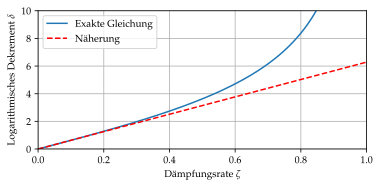

In [6]:
#| label: fig-ems_log_dek_daempfungsrate
#| fig-cap: "Dämpfungsrate anhand des logarithmischen Dekrements"

def plot_daempfungsrate():
    uN, N , T_d, zeta= sp.symbols('uN N T_d zeta')
    naherung_dekrement = 2*sp.pi * zeta
    dekrement_genau = 2*sp.pi*zeta / (sp.sqrt(1-zeta**2))
    dekrement_genau_lamb = sp.lambdify(zeta, dekrement_genau)
    naherung_dekrement_lamb = sp.lambdify(zeta, naherung_dekrement)
    zeta_array = np.linspace(0,1,1000)


    fig = plt.figure(figsize=(5.9, 2.5))



    plt.plot(zeta_array, dekrement_genau_lamb(zeta_array), label='Exakte Gleichung')
    plt.plot(zeta_array, naherung_dekrement_lamb(zeta_array), color='red',label='Näherung', linestyle='dashed')
    plt.grid()

    plt.xlabel('Dämpfungsrate $\zeta$')
    plt.ylabel('Logarithmisches Dekrement $\delta$')
    plt.xlim(0,1)
    plt.ylim(0,10)
    # plt.yticks(y_range)
    # plt.xticks(y_range)
    plt.legend(loc='upper left')

    plt.show()
plot_daempfungsrate()


Für kleine Dämpfungsraten kann folgende Gleichung verwendet werden, dies entspricht der Näherung in @fig-ems_log_dek_daempfungsrate:

$$
\zeta \simeq \frac{\delta}{2\pi}
$${#eq-ems_log_dek_daempfungsrate_approx}

Die exakte Lösung bestimmt sich folgender massen:

In [7]:
zeta = delta / (sp.sqrt(4*sp.pi**2 + delta**2))

render.eq_display('zeta_', 'delta/(sqrt(4*pi**2+delta**2))',
                  'zeta_', zeta,
                  'zeta_', zeta.subs(params).evalf(3))

          δ       
ζ = ──────────────
       ___________
      ╱  2      2 
    ╲╱  δ  + 4⋅π  

              ⎛u₀⎞       
           log⎜──⎟       
              ⎝u₁⎠       
ζ = ─────────────────────
        _________________
       ╱    2⎛u₀⎞      2 
      ╱  log ⎜──⎟ + 4⋅π  
    ╲╱       ⎝u₁⎠        

ζ = 0.0457

#### Eigenkreisfrequenz

Aus der Aufgabenstellung ist die gedämpfte Periode von $T_D = 0.2 s$ bekannt.
Anhand dieser lässt sich die *gedämpfte Eigenkreisfrequenz* $\omega_D$ bestimmen und unter Berücksichtigung der Dämpfungsrate $\zeta$ kann die *Eigenkreisfrequenz* $\omega_1$ bestimmt werden.

In [8]:
omega_D = (2*sp.pi)/ T_D

omega_1 = omega_D / (sp.sqrt(1-zeta**2))
render.eq_display('omega_D', omega_D,
                  'omega_D', omega_D.subs(params).evalf(4),
                  'omega_1', "omega_D / (sqrt(1-zeta_**2))",
                  'omega_1', omega_1.subs(params).evalf(4))

      2⋅π
ω_D = ───
      T_D

      31.42 
ω_D = ──────
      second

         ω_D    
ω₁ = ───────────
        ________
       ╱      2 
     ╲╱  1 - ζ  

     31.45 
ω₁ = ──────
     second

#### Steifigkeit 

Wir kennen die Beziehung zwischen Eigenkreisfrequenz und Steifigkeit:

$$
\omega_1 = \sqrt{\frac{k}{m}}
$${#eq-ems_log_dek_kreisfrequenz}

In [9]:
k = m*omega_1**2

render.eq_display('k','m*omega_1**2',
                  'k',k.subs(params).evalf(3))

        2
k = m⋅ω₁ 

    1.92e+6⋅newton
k = ──────────────
        meter     

### Dämpfungskonstante

Anhand der Dämpfungsrate $\zeta$ lässt sich leicht die Dämpfungskonstante bestimmen:

$$
\zeta = \frac{c}{2\omega_1m}
$${#eq-ems_log_dek_daempfungsrate}



In [10]:
c = zeta * 2*omega_1*m
render.eq_display('c',c.subs(params).evalf(3))

    5.58e+3⋅newton⋅second
c = ─────────────────────
            meter        

### Amplitude nach 10 Schwingzyklen

Das Verhalten der Amplitude ist in @fig-ems_log_dek_zerfall dargestellt.

$$
\delta = \ln({\frac{u_0}{u_1}})
$${#eq-ems_log_dek_dekrement_10}

$\delta$ ist ein konstanter Wert und kann auf 10 Zyklen erweitert werden.

In [11]:
eq = sp.Eq(sp.Symbol('delta'), sp.ln(u_0/u_1))

u_10 = u_0 * sp.exp(-10*delta)
render.eq_display('u_1', sp.solve(eq, u_1)[0],
                  'u_10', 'u_0*exp(-10*delta)',
                  'u_10', u_10.subs(params).evalf(4))

         -δ
u₁ = u₀⋅ℯ  

          -10⋅δ
u₁₀ = u₀⋅ℯ     

u₁₀ = 1.126⋅millimeter